# **¿Qué es una Cámara de Niebla?**

La cámara de niebla, inventada por Charles Wilson a comienzos del siglo XX, es un dispositivo diseñado para hacer visibles las trayectorias de partículas cargadas, como electrones, protones o rayos cósmicos, que normalmente resultan imposibles de observar a simple vista. Su funcionamiento se basa en el uso de un ambiente cerrado que contiene vapor de alcohol en estado de sobresaturación. Cuando una partícula cargada atraviesa la cámara, interactúa con las moléculas de aire y las ioniza a lo largo de su recorrido. Estos iones actúan como núcleos de condensación alrededor de los cuales el vapor se transforma en diminutas gotitas, generando una fina estela visible. De esta manera, lo que observamos en la cámara no es la partícula en sí, sino la huella que deja su paso en forma de pequeñas líneas de condensación. Según el tipo de partícula, su energía y las condiciones internas del dispositivo, estas trazas pueden aparecer más rectas, curvas o dispersas, ofreciendo información valiosa sobre el fenómeno físico. En esencia, la cámara de niebla convierte el paso invisible de las partículas en un espectáculo visual, permitiendo que la física subatómica pueda ser percibida de manera directa y experimental.

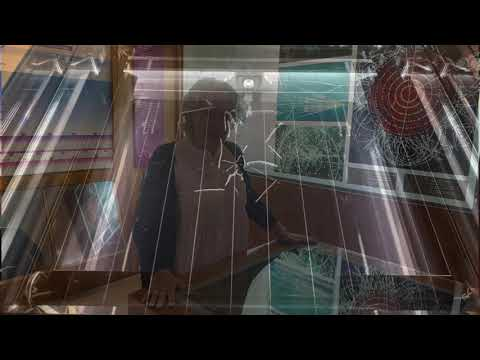

In [1]:
from IPython.display import YouTubeVideo

# Identificador del video — para el enlace que me diste es “Sj3LK5XZ3Lo”
video = YouTubeVideo("Sj3LK5XZ3Lo", width=640, height=360)

display(video)

In [2]:
#Obtención de la data
from LHC import experiment_CMS
experiment_CMS(num_img=500, size=64, zip_name="CERN_dataset")

Dataset generado con 500 imágenes por clase.
Archivo comprimido: CERN_dataset.zip


In [3]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def cargar_datos(zip_path="CERN_dataset.zip", carpeta_salida="CERN_datos"):
    #1. Proceso para descomprimir el archivo ZIP
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(carpeta_salida)
    X = []
    y = []
    #2. Recorrer las carpetas con las imagenes
    for clase in os.listdir(carpeta_salida):
        clase_path = os.path.join(carpeta_salida, clase)
        if os.path.isdir(clase_path):
            for img_name in os.listdir(clase_path):
                img_path = os.path.join(clase_path, img_name)

                # 3. Procedimiento para cargar imagenes en escala de grises
                img = Image.open(img_path).convert("L")
                X.append(np.array(img))
                y.append(clase)  # etiqueta = nombre de la carpeta

    X = np.array(X)
    return X, y

In [4]:
X, y = cargar_datos("CERN_dataset.zip")
print(f"Se cargaron {len(X)} imágenes.")
print(f"Clases encontradas: {set(y)}")
print("Dimensiones de las imágenes:", X.shape)

Se cargaron 3000 imágenes.
Clases encontradas: {'quark', 'electron', 'tau', 'muon', 'proton', 'neutrino'}
Dimensiones de las imágenes: (3000, 64, 64)


array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0, 255, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
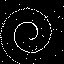

In [5]:
X[1]

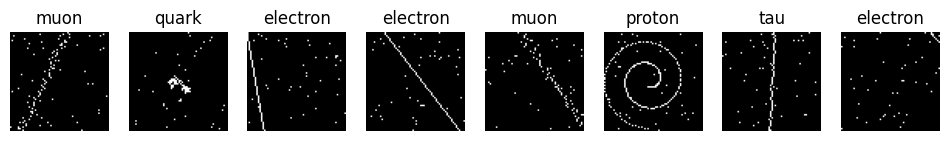

In [11]:
def mostrar_imagenes(X, y, n=6):
    indices = np.random.choice(len(X), n, replace=False)  # elegir imagen aleatoriamente
    plt.figure(figsize=(12, 4))

    for i, idx in enumerate(indices):
        plt.subplot(1, n, i+1)
        plt.imshow(X[idx], cmap="gray")
        plt.title(y[idx])
        plt.axis("off")
    plt.show()

mostrar_imagenes(X, y, n=8)

# **¿Qué es realmente una imagen?**

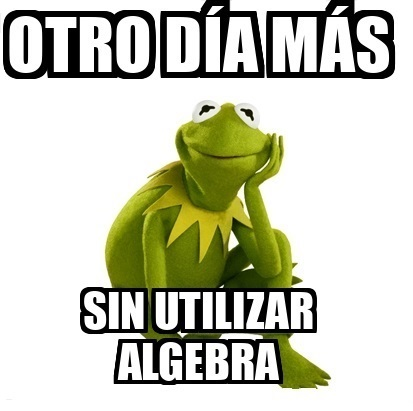

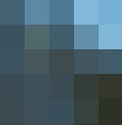

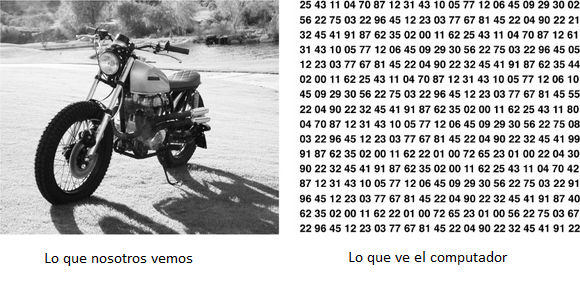

In [7]:
np.set_printoptions(threshold=np.inf)
print(X[0])
print("Etiqueta:", y[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 255   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0

## **Taller: Clasificación de Trazas de Partículas**

Construya un clasificador supervisado capaz de diferenciar entre distintos tipos de partículas a partir de imágenes de sus trazas. Para ello, se trabajará con el conjunto de datos previamente cargado, organizadas en carpetas según la clase de partícula correspondiente:

*   Electrón
*   Muón
*   Protón
*   Neutrino
*   Quark
*   Tau

Desarrolle un flujo completo de trabajo en aprendizaje automático, desde la carga y exploración de los datos hasta la evaluación de un modelo de clasificación. El ejercicio permitirá comprender los principales pasos de un proyecto de machine learning aplicado al análisis de imágenes.

1. Carga de datos.
2. Exploración inicial: Se deberán mostrar algunas imágenes representativas de cada clase, imprimir las dimensiones de X y y, y analizar la distribución de las clases en el conjunto de datos.
3. Será necesario normalizar los valores de los píxeles en el rango [0, 1], preparar los datos para el modelo y dividirlos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba).
4. Implemente al menos un modelo de clasificación supervisada. Se recomienda iniciar con modelos clásicos como: Regresión Logística y SVM.
5. Evaluación del modelo: El desempeño del clasificador deberá medirse calculando la precisión en el conjunto de prueba. Además, se deberá generar una matriz de confusión para analizar qué clases resultan más fáciles o difíciles de distinguir. Pueden calcular métricas adicionales como la exactitud por clase o las curvas ROC.
6. Discusión y conclusiones: Finalmente, deberá presentar una reflexión sobre los resultados obtenidos, identificando fortalezas y debilidades del clasificador. También deberá proponer mejoras posibles.